In [1]:

def editDistance(str1, str2, no_of_ops=None):
    if no_of_ops==None:
        no_of_ops = {}
    
    #indices of the last element in both strings
    i = len(str1)-1
    j = len(str2)-1
    key = str(i)+','+str(j)

    #if distance for key has already been calculated in no_of_ops
    if key in no_of_ops:
        return no_of_ops[key]
    
    #base case:
    #if one of the strings is empty, no of inserts or deletes = no of remaining elements in another string
    if len(str1)==0 or len(str2)==0:
        no_of_ops[key] = len(str1)+len(str2)
    #if both characters are same, we need no operation, do the same leaving the last element of both strings
    elif str1[i]==str2[j]:
        no_of_ops[key] = editDistance(str1[0:i], str2[0:j], no_of_ops)
    #if not same, we can take minimum of the operations required.
    # editDistance(str1[0:i-1], str2[0:j]) for delete
    # editDistance(str1[0:i], str2[0:j-1]) for insert
    # editDistance(str1[0:i-1], str2[0:i-1]) for replace
    else:
        no_of_ops[key] = 1 + min(editDistance(str1[0:i], str2[:], no_of_ops),
                                  editDistance(str1[:], str2[0:j], no_of_ops), 
                                 editDistance(str1[:i], str2[:j], no_of_ops))

    return no_of_ops[key]
    

In [2]:
import random
import string
import time

def gen_str(leng):
    str1 = str(''.join(random.choices(string.ascii_uppercase +
                             string.digits, k=leng)))
    str2 = str(''.join(random.choices(string.ascii_uppercase +
                             string.digits, k=leng)))
    return (str1, str2)


In [5]:
leng = []
time_taken = []
for i in range(100, 1001, 100):
    leng.append(i)
    str1, str2 = gen_str(i)
    start = time.process_time()
    editDistance(str1, str2)
    elapsed = time.process_time() - start
    time_taken.append((round(elapsed, 5)))


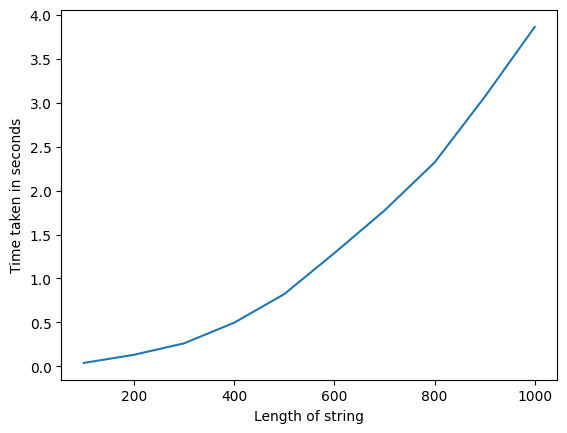

In [8]:

#plotting the results
import matplotlib.pyplot as plt
x_axis = leng
y_axis = time_taken
plt.plot(x_axis, y_axis, label="Time taken")
plt.xlabel('Length of string')
plt.ylabel('Time taken in seconds')
plt.show()